# تمرین ۴: فیلتر های لبه یاب و تیز کننده (قسمت ب)
به تصویر موتور سواران فیلتر سوبل در راستای طول و عرض اعمال کنید. تصاویر حاصل را تجمیع کنید. همین فرآیند را بوسیله
فیلتر اف که در یک بعد اعمال می شود و مقادیر آن برای شما مشخص شده است را در دو راستای طول و عرض به تصویر اعمال
کنید. همانند فیلتر سوبل دو خروجی که در یکی لبه ها در راستای طول ها و دیگری لبه ها در راستای عرض ها را مشخص می کند خواهید
داشت. خروجی ها را باهم تجمیع کنید

### Importing libraries and setting figs size

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

fig_w = 20
fig_h = 6

### Aggregate function for merging two images

In [2]:
def aggregate(img_x, img_y):
    img_x = img_x.astype(np.uint32)
    img_y = img_y.astype(np.uint32)
    return np.sqrt((img_x ** 2) + (img_y ** 2)).astype(np.uint8)

نکته مشکل ساز در پیاده سازی این تابع دقت به تایپ تصویر ورودی و تبدیل آن برای انجام دقیق محاسبات است. در صورتی کهتایپ ورودی از نوع ۸ بیتی باقی بماند در عملیات های توان و جمع اورفلو رخ داده و مقادیر اشتباه محاسبه می شوند. پس لازم است ابتدا فضای مورد نیاز جهت محاسبات ایجاد شود و پس از انجام محاسبات دوباره تایپ مورد نظر به تصویر نهایی اعمال شود

### Reading origianl image and showing it

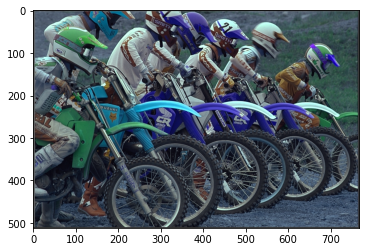

In [3]:
kodim = cv2.imread("kodim05.png", cv2.IMREAD_UNCHANGED)
plt.imshow(kodim)
plt.show()

### Applying sobel filters and showing its results

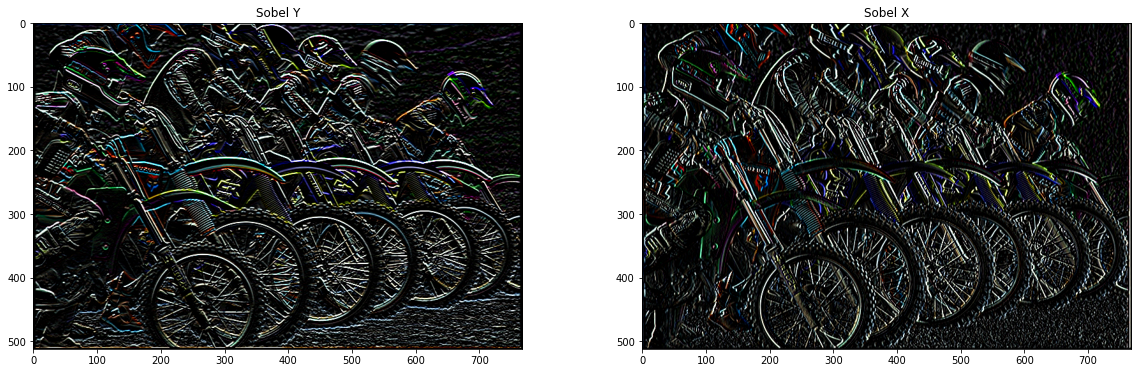

In [4]:
y_gate = np.array([[-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]])
x_gate = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
ddepth = cv2.CV_8U
border = cv2.BORDER_REPLICATE
y_kodim = cv2.filter2D(kodim, ddepth, y_gate, borderType=border)
x_kodim = cv2.filter2D(kodim, ddepth, x_gate, borderType=border)

_, subplt = plt.subplots(1, 2, figsize=(fig_w, fig_h))
subplt[0].imshow(y_kodim, cmap='gray')
subplt[0].set_title("Sobel Y")
subplt[1].imshow(x_kodim, cmap='gray')
subplt[1].set_title("Sobel X")
plt.show()

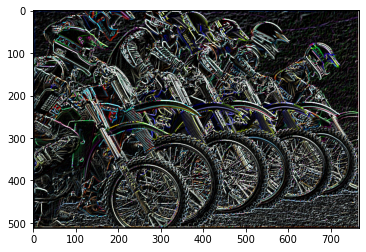

In [5]:
plt.imshow(aggregate(x_kodim, y_kodim), cmap='gray')
plt.show()

### Applying F filters and showing its results

نکته: به نظر میرسد مقدار پنجم و ششم فیلتر در صورت سوال اشتباه آورده شده مقادیر صحیح در کد زیر اعمال شده اند

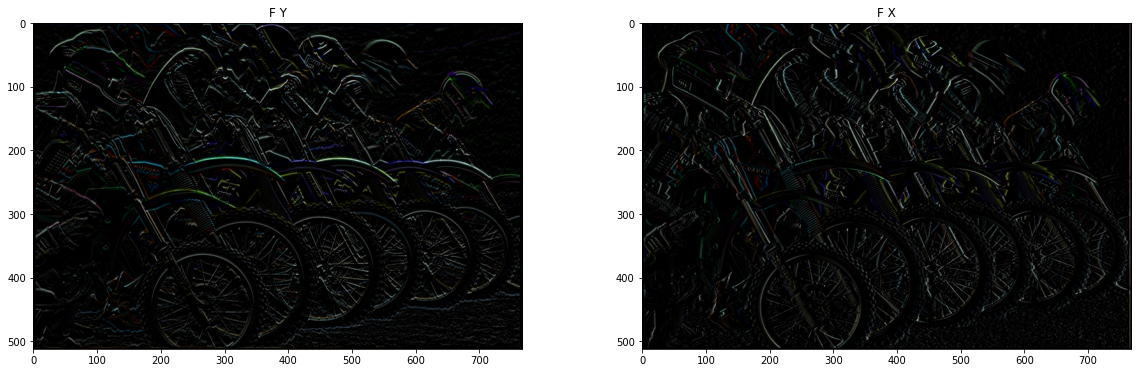

In [6]:
F = np.array(
    [[-0.0052625, -0.0173466, -0.0427401, -0.0768961, -0.0957739, -0.6696751, 0, 0.6696751, 0.0957739, 0.0768961,
     0.0427401, 0.0173466, 0.0052625]])

Fy_kodim = cv2.filter2D(kodim, ddepth, F.transpose(), borderType=border)
Fx_kodim = cv2.filter2D(kodim, ddepth, F, borderType=border)

_, subplt = plt.subplots(1, 2, figsize=(fig_w, fig_h))
subplt[0].imshow(Fy_kodim, cmap='gray')
subplt[0].set_title("F Y")
subplt[1].imshow(Fx_kodim, cmap='gray')
subplt[1].set_title("F X")
plt.show()

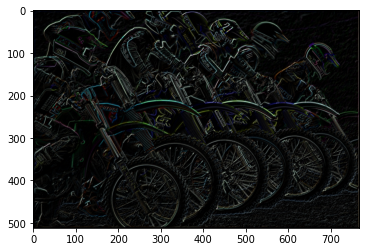

In [7]:
plt.imshow(aggregate(Fx_kodim, Fy_kodim))
plt.show()

مشاهده می شود که فیلتر اف نسبت به فیلتر سوبل به نوعی کمرنگ تر بوده دلیل آن به علت بزرگ تر بودن آرایه فیلتر اف می باشد. بلند بودن طول فیلتر منجر به آن می شود که لبه های متزلزل در خروجی ظاهر نشوند. به عبارتی دیگر در فیلتر سوبل اختلاف دو پیکسل مجاور به ایجاد لبه منجر می شود، در صورتی که در فیلتر اف برای ایجاد لبه به فضایی بیشتر از دو پیکس نیاز داریم و مقادیر بیش تری برای ثبت لبه سنجیده می شوند